In [1]:
import pickle
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
import pandas as pd
from scipy import stats

In [2]:
# data_inc = pickle.load(open("conv_inc.pk", "rb"))

In [3]:
data_new = pickle.load(open("conv_temporal_det.pk", "rb"))

In [4]:
data_inc={}
data_vps={}
for i in data_new:
    data_inc[i]=data_new[i]["incivility_temporal"]
    data_vps[i]=data_new[i]["annotation_temporal"]    

In [5]:
data_nontmp = pickle.load(open("conv_det.pk", "rb"))

In [6]:
data_nontmp[0]

{'labels': {'L1': 3, 'L3': 1},
 'size': 4,
 'depth': 2,
 'avg_length': 1.5,
 'actual_paths': [['1255499209236717570',
   '1255484280916115458',
   '1255272961331822593'],
  ['1255274302750031872', '1255272961331822593']],
 'authors': ['259240557', '16453340', '260743135', '833712030905487360'],
 'authors_count': 4,
 'distinct_authors_count': 4,
 'WI': 1.6666666666666667,
 'root_node': '1255272961331822593',
 'root_node_label': 'L1',
 'tweet_author': {'1255499209236717570': '259240557',
  '1255272961331822593': '16453340',
  '1255484280916115458': '260743135',
  '1255274302750031872': '833712030905487360'},
 'tweet_viewpoint': {'1255499209236717570': 'L1',
  '1255272961331822593': 'L1',
  '1255484280916115458': 'L1',
  '1255274302750031872': 'L3'},
 'tweet_incivility': {'1255499209236717570': 0.0,
  '1255272961331822593': 0.0,
  '1255484280916115458': 0.0,
  '1255274302750031872': 1.0},
 'incivility': [0.0, 0.0, 0.0, 1.0],
 'annotation': [],
 'tweet_id': ['1255499209236717570',
  '12552

In [19]:
#number of per label authors per conversation
l1_auth_frac=[]
l2_auth_frac=[]
l3_auth_frac=[]
l4_auth_frac=[]
for i in data_nontmp:
    l1_auth = []
    l2_auth = []
    l3_auth = []
    l4_auth = []
    
    for j in data_nontmp[i]["tweet_author"]:
        if data_nontmp[i]["tweet_author"][j] not in l1_auth and data_nontmp[i]["tweet_viewpoint"][j] == "L1":
            l1_auth.append(data_nontmp[i]["tweet_author"][j])
        elif data_nontmp[i]["tweet_author"][j] not in l2_auth and data_nontmp[i]["tweet_viewpoint"][j] == "L2":
            l2_auth.append(data_nontmp[i]["tweet_author"][j])
        elif data_nontmp[i]["tweet_author"][j] not in l3_auth and data_nontmp[i]["tweet_viewpoint"][j] == "L3":
            l3_auth.append(data_nontmp[i]["tweet_author"][j])
        elif data_nontmp[i]["tweet_author"][j] not in l4_auth and data_nontmp[i]["tweet_viewpoint"][j] == "L4":
            l4_auth.append(data_nontmp[i]["tweet_author"][j])
    sum1 = (len(l1_auth)+len(l2_auth)+len(l3_auth)+len(l4_auth))
    # print(list(data_nontmp[i]["tweet_viewpoint"].values()))
    c = Counter(list(data_nontmp[i]["tweet_viewpoint"].values())) # is a dict
    if c["L1"]!=0:
        l1_auth_frac.append(len(l1_auth)/c["L1"]) # divided by num L1 tweets
    if c["L2"]!=0:
        l2_auth_frac.append(len(l2_auth)/c["L2"])
    if c["L3"]!=0:
        l3_auth_frac.append(len(l3_auth)/c["L3"])
    if c["L4"]!=0:
        l4_auth_frac.append(len(l4_auth)/c["L4"])       

In [20]:
print(np.mean(l1_auth_frac),np.mean(l2_auth_frac),np.mean(l3_auth_frac),np.mean(l4_auth_frac))

0.7478442946709771 0.9286205958802113 0.9298537390516 0.9385319138226115


In [10]:
data_wix={}
data_size ={}
num_authors={}
size=[]
for i in data_nontmp:
    data_wix[i]=data_nontmp[i]["WI"]
    data_size[i]=data_nontmp[i]["size"]   
    num_authors[i]=data_nontmp[i]["distinct_authors_count"]

In [11]:
s=[]
d=[]
a=[]
for i in data_nontmp:
    s.append(data_nontmp[i]["size"])
    d.append(data_nontmp[i]["depth"])
    a.append(data_nontmp[i]["distinct_authors_count"])
    

In [12]:
depth=[]
for i in data_new:
    depth.append(data_new[i]["depth"])
    size.append(data_nontmp[i]["size"])

In [13]:
#calculating inc_frac

count=[]
inc_frac = []
inc = {}
wix=[]
lengths=[]
auth=[]
for i in data_inc:
    x=Counter(data_inc[i])[1.0]
    y=len(data_inc[i])
    wix.append(data_wix[i])
    count.append(x)
    lengths.append(y)
    inc_frac.append(x/y)
    inc[i] = x/y
    auth.append(num_authors[i])

In [14]:
print(stats.pearsonr(inc_frac,lengths))
print(stats.pearsonr(inc_frac,depth))

(0.13156238326479255, 0.011759296951983175)
(-0.005255146352344871, 0.920190581807788)


In [15]:
#calculating L1-L4 frac

l1=[]
l2=[]
l3=[]
l4=[]

for i in data_inc:
    temp=Counter(data_vps[i])
    l1.append(temp["L1"]/len(data_vps[i]))
    l2.append(temp["L2"]/len(data_vps[i]))   
    l3.append(temp["L3"]/len(data_vps[i]))    
    l4.append(temp["L4"]/len(data_vps[i]))    

In [16]:
substantive = list(np.add(l3,l4))
non_sub = list(np.add(l1,l2))

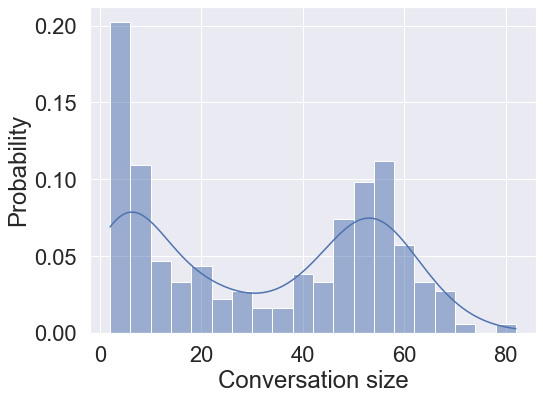

In [31]:
sns.set_theme()
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(s,kde=True,stat="probability",bins=20).set(xlabel="Conversation size")
plt.savefig("convo_size.pdf", bbox_inches='tight')

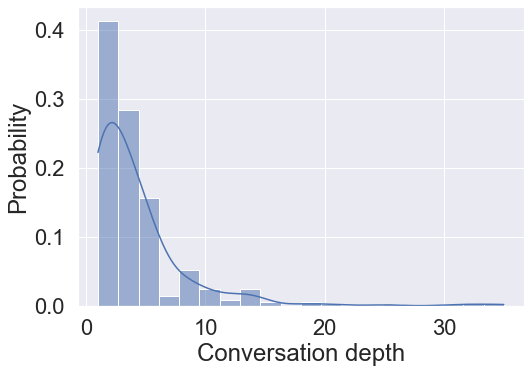

In [32]:
sns.histplot(d,kde=True,stat="probability",bins=20).set(xlabel="Conversation depth")
plt.savefig("convo_depth.pdf", bbox_inches='tight')

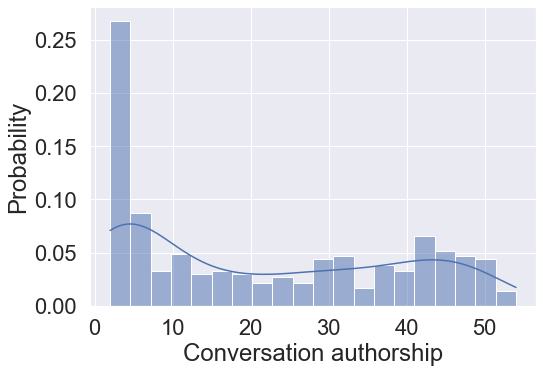

In [33]:
sns.histplot(a,kde=True,stat="probability",bins=20).set(xlabel="Conversation authorship")
plt.savefig("convo_author.pdf", bbox_inches='tight')

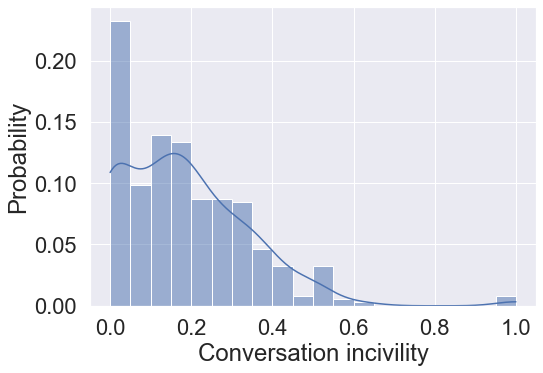

In [34]:
sns.histplot(inc_frac,kde=True,stat="probability",bins=20).set(xlabel="Conversation incivility")
plt.savefig("convo_inc.pdf", bbox_inches='tight')

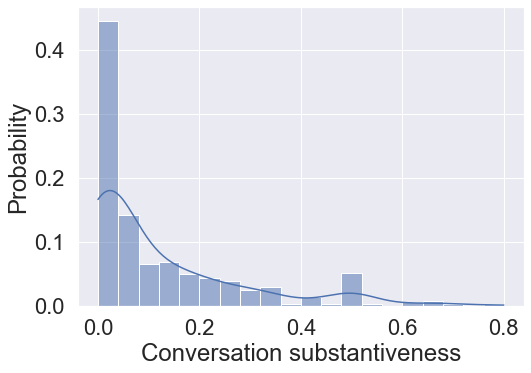

In [35]:
sns.histplot(substantive,kde=True,stat="probability",bins=20).set(xlabel="Conversation substantiveness")
plt.savefig("convo_sub.pdf", bbox_inches='tight')

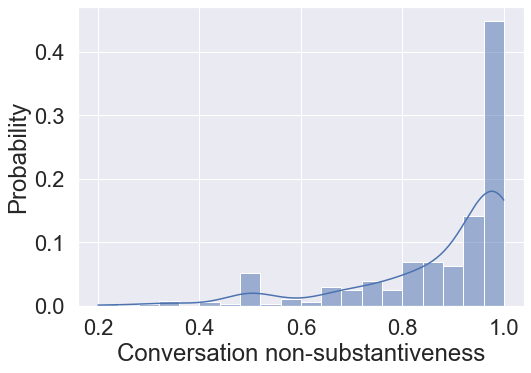

In [36]:
sns.histplot(non_sub,kde=True,stat="probability",bins=20).set(xlabel="Conversation non-substantiveness")
plt.savefig("convo_non_sub.pdf", bbox_inches='tight')

In [14]:
print(stats.pearsonr(inc_frac, substantive))
print(stats.pearsonr(inc_frac, non_sub))
print(stats.pearsonr(inc_frac, size))
print(stats.pearsonr(inc_frac, depth))
print(stats.pearsonr(inc_frac, wix))
print(stats.pearsonr(inc_frac, auth))

(0.08051862935746225, 0.12413657573378648)
(-0.08051862935746229, 0.12413657573378648)
(0.13003336119913816, 0.01278313543752274)
(-0.005255146352344871, 0.920190581807788)
(-0.010383678431019545, 0.843062839949296)
(0.14969803721963784, 0.004101005128203459)


In [15]:
print(stats.pearsonr(substantive,inc_frac))
print(stats.pearsonr(substantive, non_sub))
print(stats.pearsonr(substantive, size))
print(stats.pearsonr(substantive, depth))
print(stats.pearsonr(substantive, wix))
print(stats.pearsonr(substantive, auth))

(0.08051862935746225, 0.12413657573378648)
(-1.0, 0.0)
(-0.39082072301928517, 8.35073069500453e-15)
(-0.2460872838837557, 1.8857078566696267e-06)
(-0.27653163696030447, 7.553364747983052e-08)
(-0.3225780238689104, 2.6172405084396023e-10)


In [16]:
print(stats.pearsonr(non_sub, inc_frac))
print(stats.pearsonr(non_sub, substantive))
print(stats.pearsonr(non_sub, size))
print(stats.pearsonr(non_sub, depth))
print(stats.pearsonr(non_sub, wix))
print(stats.pearsonr(non_sub, auth))

(-0.08051862935746229, 0.12413657573378648)
(-1.0, 0.0)
(0.3908207230192852, 8.35073069500453e-15)
(0.2460872838837557, 1.8857078566696267e-06)
(0.2765316369603045, 7.553364747983294e-08)
(0.3225780238689104, 2.6172405084396023e-10)


In [14]:
print(stats.pearsonr(l1,size))
print(stats.pearsonr(l2,size))
print(stats.pearsonr(l3,size))
print(stats.pearsonr(l4,size))

(0.4784498951860846, 2.4548618542934624e-22)
(-0.2921847423259909, 1.2303799904750298e-08)
(-0.1432170849094502, 0.006056726960805915)
(-0.3521689167387591, 3.981111017275514e-12)


In [15]:
print(stats.pearsonr(l1,depth))
print(stats.pearsonr(l2,depth))
print(stats.pearsonr(l3,depth))
print(stats.pearsonr(l4,depth))

(0.2778091709668672, 6.540750510564595e-08)
(-0.15083588783581423, 0.0038236543442689954)
(-0.1393350053783949, 0.007595267530558222)
(-0.1852266664282449, 0.0003675542442643988)


In [17]:
df = pd.DataFrame({"depth":depth,"size":size,"L1":l1,"L2":l2,"L3":l3,"L4":l4,"inc":inc_frac,"num_authors":auth})

In [18]:
df.to_csv("Ml_training_file3.csv")

In [79]:
all_vps = []
all_size =[]
label=[]
all_depth=[]

all_vps.extend(l1)
all_vps.extend(l2)
all_vps.extend(l3)
all_vps.extend(l4)

all_size.extend(lengths)
all_size.extend(lengths)
all_size.extend(lengths)
all_size.extend(lengths)

all_depth.extend(depth)
all_depth.extend(depth)
all_depth.extend(depth)
all_depth.extend(depth)

for i in range(len(l1)):
    label.append("L1")
    
for i in range(len(l1)):
    label.append("L2")
    
for i in range(len(l1)):
    label.append("L3")
    
for i in range(len(l1)):
    label.append("L4")

In [80]:
df = pd.DataFrame({"Size":all_size, "Vps_frac":all_vps, "Viewpoint":label, "depth":all_depth})

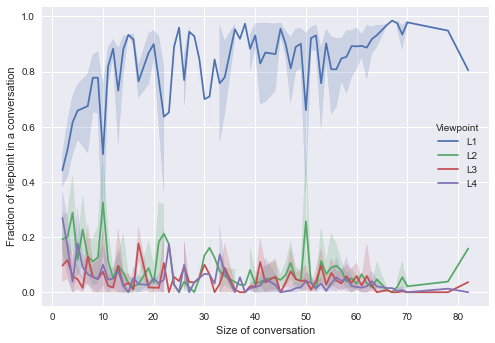

In [81]:

# dist = sns.scatterplot(x=count,y=lengths)
dist = sns.lineplot(data=df,x="Size",y="Vps_frac",hue="Viewpoint")
dist.set(ylabel = "Fraction of viepoint in a conversation", xlabel="Size of conversation")
plt.savefig("vps_frac_size.png")
  # dist.set_xticks(np.arange(-1,1.2,0.2)) 
  # plt.figure()

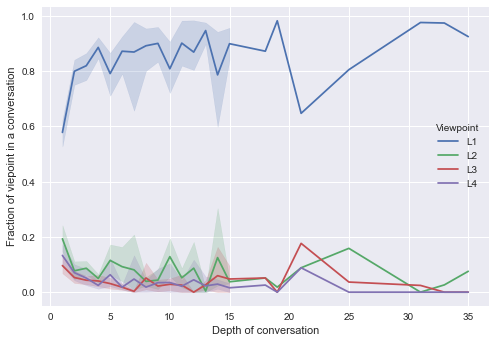

In [82]:

# dist = sns.scatterplot(x=count,y=lengths)
dist = sns.lineplot(data=df,x="depth",y="Vps_frac",hue="Viewpoint")
dist.set(ylabel = "Fraction of viepoint in a conversation", xlabel="Depth of conversation")
plt.savefig("vps_frac_depth.png")
  # dist.set_xticks(np.arange(-1,1.2,0.2)) 
  # plt.figure()

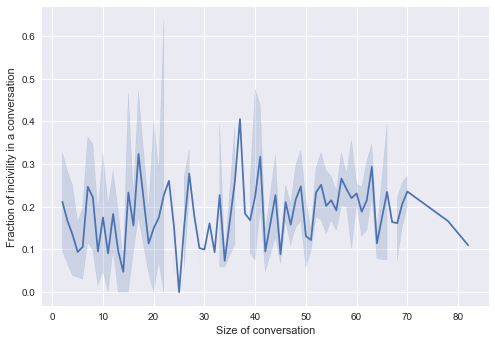

In [84]:

dist = sns.lineplot(x=lengths,y=inc_frac)
dist.set(ylabel = "Fraction of incivility in a conversation", xlabel="Size of conversation")
plt.savefig("inc_frac_size.png")
  # dist.set_xticks(np.arange(-1,1.2,0.2)) 
  # plt.figure()

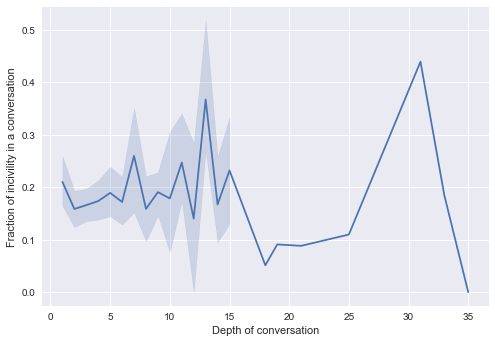

In [32]:
dist = sns.lineplot(x=depth,y=inc_frac)
dist.set(ylabel = "Fraction of incivility in a conversation", xlabel="Depth of conversation")
plt.savefig("inc_frac_depth.png")
  # dist.set_xticks(np.arange(-1,1.2,0.2)) 
  # plt.figure()

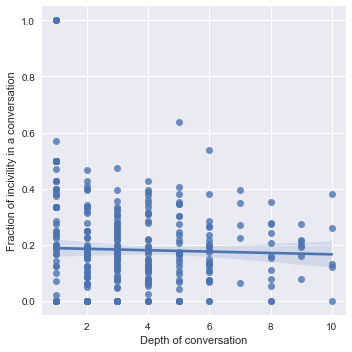

In [30]:
#depth vs incivility where depth<10
depthx=[]
inc_fracx=[]
for n,i in enumerate(depth):
    
    if (i<=10):
        depthx.append(i)
        inc_fracx.append(inc_frac[n])

data = pd.DataFrame({"x":depthx,"y":inc_fracx})
dist = sns.lmplot(x="x",y="y",data=data)
dist.set(ylabel = "Fraction of incivility in a conversation", xlabel="Depth of conversation")
plt.savefig("inc_frac_depth10.png")
  # dist.set_xticks(np.arange(-1,1.2,0.2)) 
  # plt.figure()

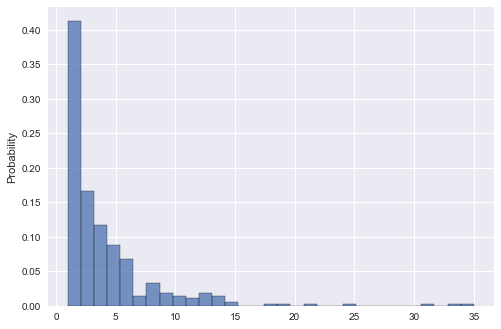

In [93]:
sns.histplot(depth,stat="probability")
plt.savefig("depth_dist.png")

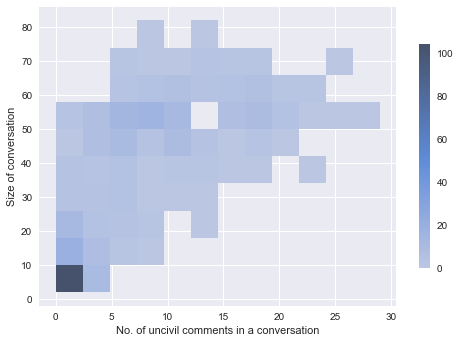

In [70]:

# dist = sns.scatterplot(x=count,y=lengths)
dist = sns.histplot(x=count,y=lengths,cbar=True,cbar_kws=dict(shrink=0.75))
dist.set(xlabel = "No. of uncivil comments in a conversation", ylabel="Size of conversation")
plt.savefig("size.png")
  # dist.set_xticks(np.arange(-1,1.2,0.2)) 
  # plt.figure()

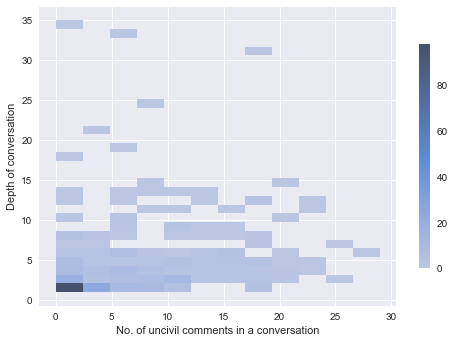

In [10]:
# dist = sns.scatterplot(x=count,y=depth)
dist = sns.histplot(x=count,y=depth,cbar=True,cbar_kws=dict(shrink=0.75))

dist.set(xlabel = "No. of uncivil comments in a conversation", ylabel="Depth of conversation")
plt.savefig("depth_heat.png")

  # dist.set_xticks(np.arange(-1,1.2,0.2)) 
  # plt.figure()

In [79]:
#length of conversation after 1st uncivil message

rem_len=[]
for i in data_inc:
    try:
        rem_len.append(len(data_inc[i])-(data_inc[i].index(1.0)+1))
    except:
        rem_len.append(len(data_inc[i]))

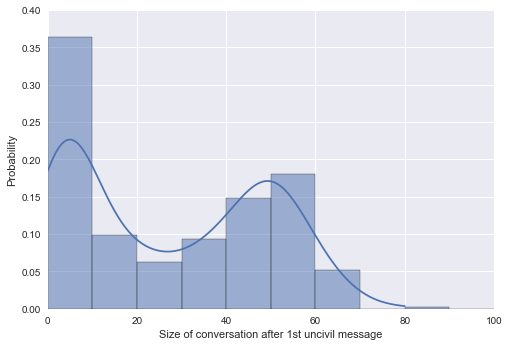

In [80]:
dist = sns.histplot(x=rem_len,kde=True,bins=10, stat="probability",binrange=[0,100])
dist.set(xlabel = "Size of conversation after 1st uncivil message", xlim=(0,100),ylim=(0,0.4))
plt.savefig("1st_uncivil_dist.png")


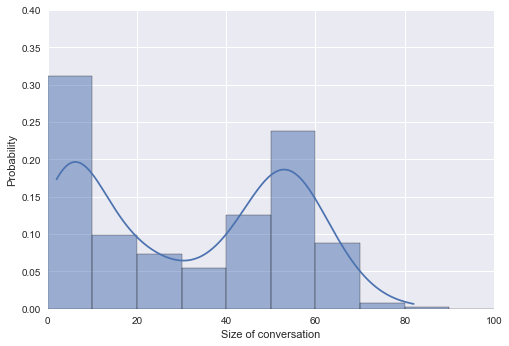

In [81]:
dist = sns.histplot(x=lengths,kde=True,bins=10, stat="probability",binrange=[0,100])
dist.set(xlabel = "Size of conversation", xlim=(0,100),ylim=(0,0.4))
plt.savefig("size_dist.png")


In [82]:
np.mean(rem_len)

27.284153005464482

In [83]:
np.mean(lengths)

31.538251366120218

In [84]:
fracs=[]
for n,i in enumerate(rem_len):
    fracs.append(i/lengths[n])

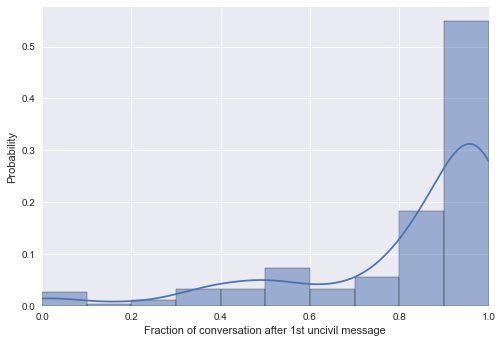

In [85]:
dist = sns.histplot(x=fracs,kde=True,bins=10, stat="probability",binrange=[0,1])
dist.set(xlabel = "Fraction of conversation after 1st uncivil message", xlim=(0,1))
plt.savefig("frac_1st_uncivil_dist.png")


In [86]:
#conversation before and after uncivil message

prev = []
post=[]
for i in data_inc:
    try:
        prev.append(data_vps[i][:data_inc[i].index(1.0)])
        post.append(data_vps[i][data_inc[i].index(1.0)+1:])
        
    except:
        prev.append(data_vps[i])
        post.append([])

<Figure size 576x396 with 0 Axes>

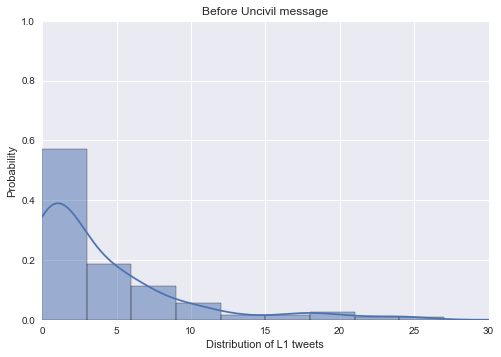

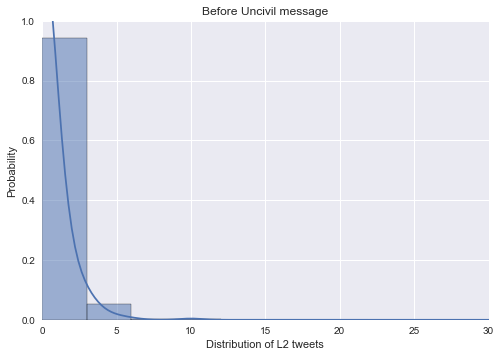

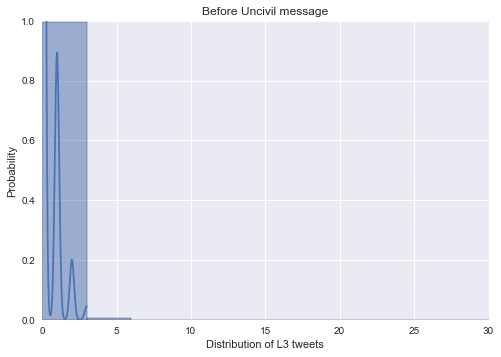

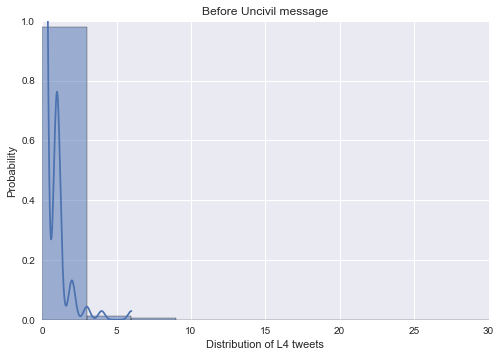

<Figure size 576x396 with 0 Axes>

In [87]:
prev_count=[]
for i in prev:
    prev_count.append(Counter(i))

l1=[]
l2=[]
l3=[]
l4=[]

for i in prev_count:
    l1.append(i["L1"])
    l2.append(i["L2"])    
    l3.append(i["L3"])    
    l4.append(i["L4"])   

dist = sns.histplot(x=l1,kde=True,bins=10, stat="probability",binrange=[0,30])
dist.set(xlabel = "Distribution of L1 tweets", title="Before Uncivil message",xlim=(0,30),ylim=(0,1))
plt.savefig("before_L1.png")

plt.figure()
dist = sns.histplot(x=l2,kde=True,bins=10, stat="probability",binrange=[0,30])
dist.set(xlabel = "Distribution of L2 tweets", title="Before Uncivil message", xlim=(0,30),ylim=(0,1))
plt.savefig("before_L2.png")

plt.figure()

dist = sns.histplot(x=l3,kde=True,bins=10, stat="probability",binrange=[0,30])
dist.set(xlabel = "Distribution of L3 tweets", title="Before Uncivil message", xlim=(0,30),ylim=(0,1))
plt.savefig("before_L3.png")

plt.figure()

dist = sns.histplot(x=l4,kde=True,bins=10, stat="probability",binrange=[0,30])
dist.set(xlabel = "Distribution of L4 tweets", title="Before Uncivil message", xlim=(0,30),ylim=(0,1))
plt.savefig("before_L4.png")

plt.figure()



<Figure size 576x396 with 0 Axes>

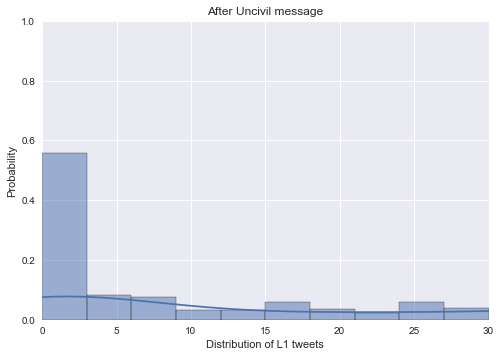

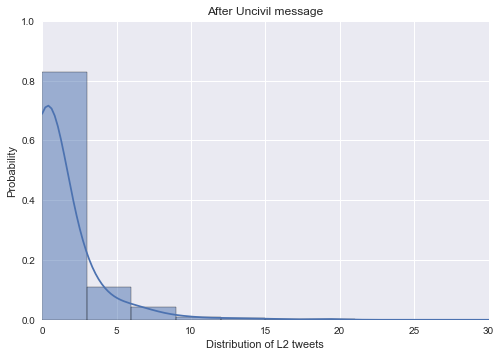

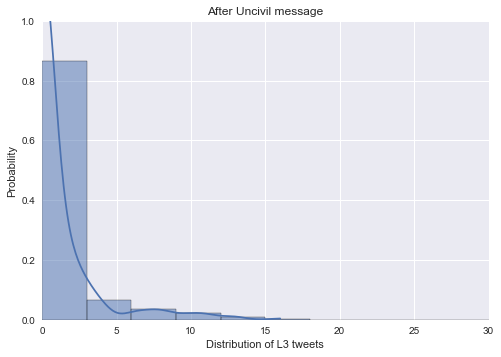

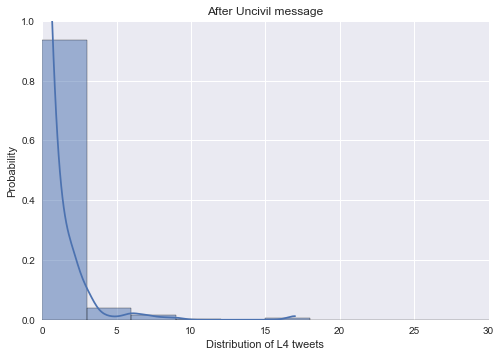

<Figure size 576x396 with 0 Axes>

In [88]:
post_count=[]
for i in post:
    post_count.append(Counter(i))

l1=[]
l2=[]
l3=[]
l4=[]

for i in post_count:
    l1.append(i["L1"])
    l2.append(i["L2"])    
    l3.append(i["L3"])    
    l4.append(i["L4"])   

dist = sns.histplot(x=l1,kde=True,bins=10, stat="probability",binrange=[0,30])
dist.set(xlabel = "Distribution of L1 tweets", title="After Uncivil message",xlim=(0,30),ylim=(0,1))
plt.savefig("after_L1.png")

plt.figure()
dist = sns.histplot(x=l2,kde=True,bins=10, stat="probability",binrange=[0,30])
dist.set(xlabel = "Distribution of L2 tweets", title="After Uncivil message", xlim=(0,30),ylim=(0,1))
plt.savefig("after_L2.png")

plt.figure()

dist = sns.histplot(x=l3,kde=True,bins=10, stat="probability",binrange=[0,30])
dist.set(xlabel = "Distribution of L3 tweets", title="After Uncivil message", xlim=(0,30),ylim=(0,1))
plt.savefig("after_L3.png")

plt.figure()

dist = sns.histplot(x=l4,kde=True,bins=10, stat="probability",binrange=[0,30])
dist.set(xlabel = "Distribution of L4 tweets", title="After Uncivil message", xlim=(0,30),ylim=(0,1))
plt.savefig("after_L4.png")

plt.figure()

<Figure size 576x396 with 0 Axes>

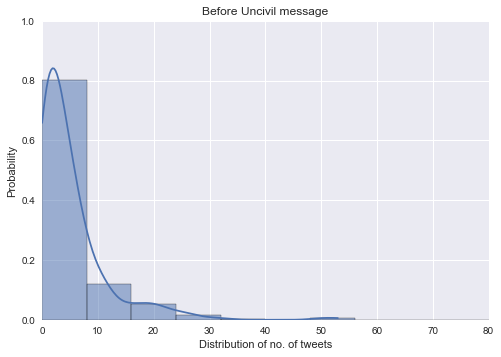

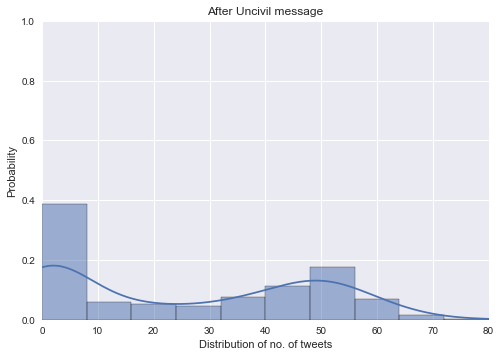

<Figure size 576x396 with 0 Axes>

In [89]:
prev_len=[]
for i in prev:
    prev_len.append(len(i))
    
post_len=[]
for i in post:
    post_len.append(len(i))
    
dist = sns.histplot(x=prev_len,kde=True,bins=10, stat="probability",binrange=[0,80])
dist.set(xlabel = "Distribution of no. of tweets", title="Before Uncivil message",xlim=(0,80),ylim=(0,1))
plt.savefig("before_freq.png")

plt.figure()
dist = sns.histplot(x=post_len,kde=True,bins=10, stat="probability",binrange=[0,80])
dist.set(xlabel = "Distribution of no. of tweets", title="After Uncivil message", xlim=(0,80),ylim=(0,1))
plt.savefig("after_freq.png")

plt.figure()


In [90]:
no_uncivil=[]
uncivil=[]
for n,i in enumerate(data_inc):
    if len(post[n])==0:
        no_uncivil.append(len(data_inc[i]))
    else:
        uncivil.append(len(data_inc[i]))

In [91]:
len(no_uncivil)

88

In [92]:
len(uncivil)

278

In [93]:
np.mean(no_uncivil)

7.318181818181818

In [94]:
np.mean(uncivil)

39.20503597122302

<Figure size 576x396 with 0 Axes>

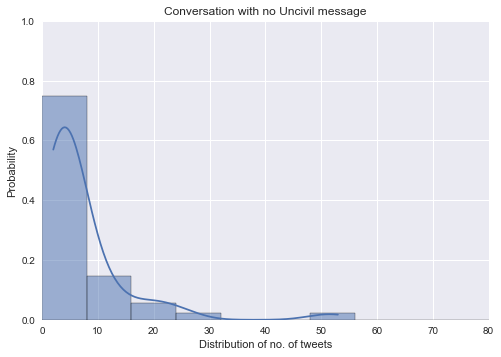

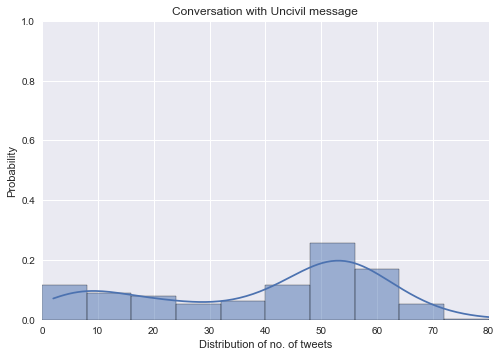

<Figure size 576x396 with 0 Axes>

In [95]:
dist = sns.histplot(x=no_uncivil,kde=True,bins=10, stat="probability",binrange=[0,80])
dist.set(xlabel = "Distribution of no. of tweets", title="Conversation with no Uncivil message",xlim=(0,80),ylim=(0,1))
plt.savefig("no_uncivil_dist.png")

plt.figure()
dist = sns.histplot(x=uncivil,kde=True,bins=10, stat="probability",binrange=[0,80])
dist.set(xlabel = "Distribution of no. of tweets", title="Conversation with Uncivil message", xlim=(0,80),ylim=(0,1))
plt.savefig("uncivil_dist.png")

plt.figure()


In [102]:
#buckets for W-idx

bucket=[]
for i in data_size:
    if data_size[i] <10:
        bucket.append(1)
    elif data_size[i]>=10 and data_size[i]<20:
        bucket.append(2)
    elif data_size[i]>=20 and data_size[i]<30:
        bucket.append(3)
    elif data_size[i]>=30 and data_size[i]<40:
        bucket.append(4)
    elif data_size[i]>=40 and data_size[i]<50:
        bucket.append(5)
    elif data_size[i]>=50 and data_size[i]<60:
        bucket.append(6)
    elif data_size[i]>=60 and data_size[i]<70:
        bucket.append(7)
    else:
        bucket.append(8)

In [105]:
bucket=[]
for i in data_size:
    if data_size[i] <20:
        bucket.append(1)
    elif data_size[i]>=20 and data_size[i]<40:
        bucket.append(3)
    elif data_size[i]>=40 and data_size[i]<60:
        bucket.append(5)
    elif data_size[i]>=60: 
        bucket.append(8)

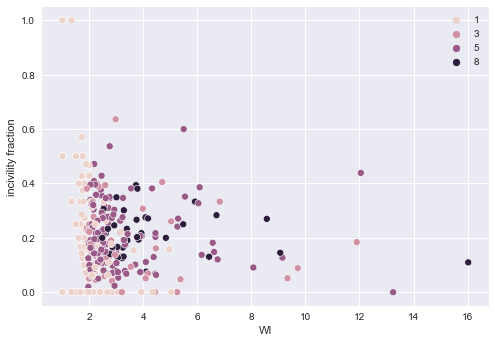

In [113]:
dist = sns.scatterplot(x=data_wix.values(),y=inc.values(),hue=bucket)
dist.set(xlabel="WI",ylabel="incivility fraction")
plt.savefig("WI.png")

<AxesSubplot:ylabel='Count'>

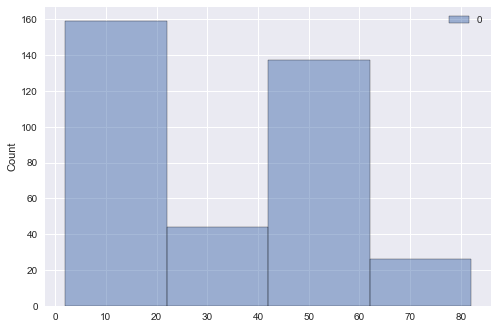

In [111]:
sns.histplot(data_size.values(),bins=4)

In [10]:
#user analysis
from collections import defaultdict
user_tweets = defaultdict(lambda: 0)
user_inc = defaultdict(lambda: 0)
# convo_frac = defaultdict(lambda: [])
inc_convo=[]
inc_user_list=[]
inc_user_frac=[]
user_numtweets=[]
for i in data_nontmp:
    user_tweets = defaultdict(lambda: 0)
    user_inc = defaultdict(lambda: 0)
    for j in data_nontmp[i]["tweet_author"]:
        user_tweets[data_nontmp[i]["tweet_author"][j]]+=1
        if data_nontmp[i]["tweet_incivility"][j] == 1.0:
            user_inc[data_nontmp[i]["tweet_author"][j]]+=1
    
    for k in user_inc:
        inc_user_frac.append(user_inc[k]/user_tweets[k])
        user_numtweets.append(user_tweets[k]/sum(user_tweets.values()))
        inc_convo.append(inc[i])
        inc_user_list.append(user_inc[k])

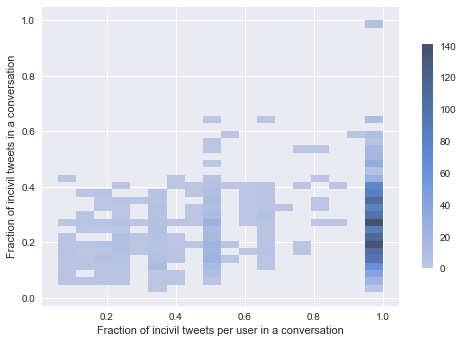

In [11]:
dist=sns.histplot(x=inc_user_frac,y=inc_convo,cbar=True,cbar_kws=dict(shrink=0.75))
dist.set(xlabel = "Fraction of incivil tweets per user in a conversation", ylabel="Fraction of incivil tweets in a conversation")
plt.savefig("toxic_tweets_user.png")

In [12]:
stats.pearsonr(inc_user_frac,inc_convo)

(0.18339931960078526, 1.3355106727922516e-15)

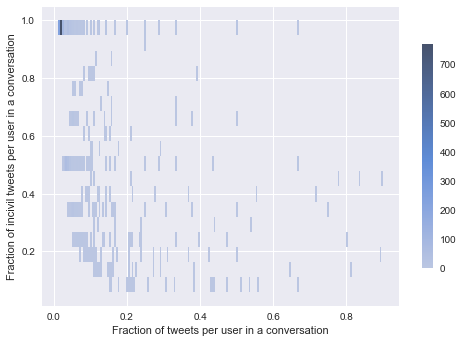

In [18]:
dist=sns.histplot(x=user_numtweets,y=inc_user_frac,cbar=True,cbar_kws=dict(shrink=0.75))
dist.set(xlabel = "Fraction of tweets per user in a conversation", ylabel="Fraction of incivil tweets per user in a conversation")
plt.savefig("toxic_frac_user.png")

In [13]:
stats.pearsonr(user_numtweets,inc_user_frac)

(-0.4578619136068747, 1.6809807651713133e-97)

In [63]:
#mediation affect studies - controlling for size, depth, authors -- combined with LR models

x = np.load("all_preds_depth_2.npy",allow_pickle=True)
y = np.load("all_preds_depth_4.npy",allow_pickle=True)
z = np.load("all_preds_depth_8.npy",allow_pickle=True)

In [37]:
x = np.load("all_preds_size_15.npy",allow_pickle=True)
y = np.load("all_preds_size_30.npy",allow_pickle=True)
z = np.load("all_preds_size_50.npy",allow_pickle=True)

In [69]:
x = np.load("all_preds_authors_9.npy",allow_pickle=True)
y = np.load("all_preds_authors_32.npy",allow_pickle=True)
z = np.load("all_preds_authors_50.npy",allow_pickle=True)

In [51]:
l3_val=[]
label=[]
preds=[]

preds.extend(x[0])
preds.extend(y[0])
preds.extend(z[0])

l = [0.5,0.4,0.3,0.2,0.1,0]
l3_val.extend(l)
l3_val.extend(l)
l3_val.extend(l)

label=[3]*len(x[0])
label.extend([6]*len(x[0]))
label.extend([9]*len(x[0]))

In [64]:
l3_val=[]
label=[]
preds=[]
preds.extend(x[1])
preds.extend(y[1])
preds.extend(z[1])

l = [1, 0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]
l3_val.extend(l)
l3_val.extend(l)
l3_val.extend(l)

label=[3]*len(x[1])
label.extend([6]*len(x[1]))
label.extend([9]*len(x[1]))

In [70]:
l3_val=[]
label=[]
preds=[]

preds.extend(x[2])
preds.extend(y[2])
preds.extend(z[2])

l = [0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]
l3_val.extend(l)
l3_val.extend(l)
l3_val.extend(l)

label=[3]*len(x[2])
label.extend([6]*len(x[2]))
label.extend([9]*len(x[2]))

In [71]:
for n,i in enumerate(preds):
    preds[n]=i[0]

In [72]:
df = pd.DataFrame({"preds":preds,"label":label,"l3":l3_val})

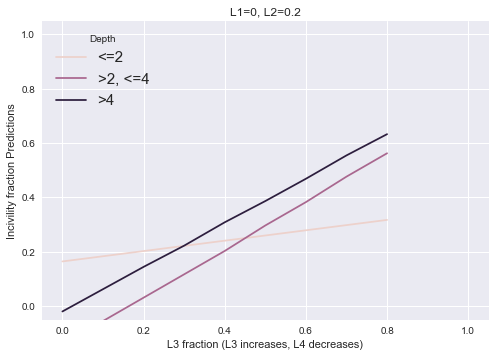

In [68]:
dist = sns.lineplot(data=df,x="l3",y="preds",hue="label")
dist.set(xlabel="L3 fraction (L3 increases, L4 decreases)",ylabel="Incivility fraction Predictions", title="L1=0, L2=0.2",xlim=(-0.05,1.05),ylim=(-0.05,1.05))
dist.legend(title='Depth', loc='upper left', labels=['<=2', '>2, <=4', ">4"],  prop={"size":15})
plt.savefig("depth2.png")

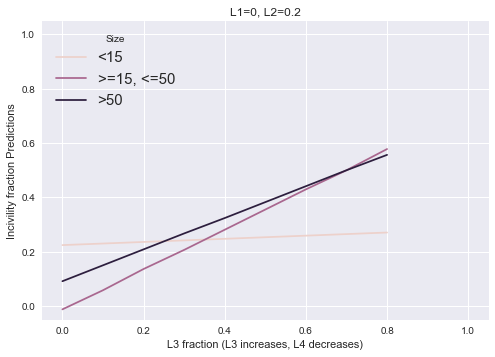

In [49]:
dist = sns.lineplot(data=df,x="l3",y="preds",hue="label")
dist.set(xlabel="L3 fraction (L3 increases, L4 decreases)",ylabel="Incivility fraction Predictions", title="L1=0, L2=0.2",xlim=(-0.05,1.05),ylim=(-0.05,1.05))
dist.legend(title='Size', loc='upper left', labels=['<15', '>=15, <=50', ">50"],  prop={"size":15})
plt.savefig("size2.png")

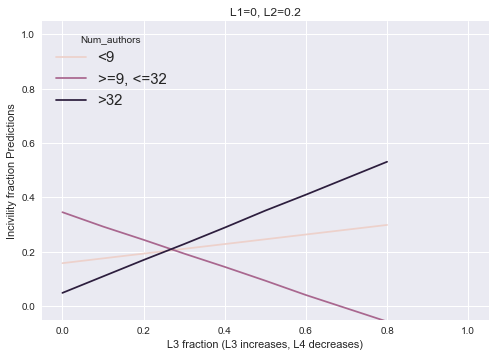

In [73]:
dist = sns.lineplot(data=df,x="l3",y="preds",hue="label")
dist.set(xlabel="L3 fraction (L3 increases, L4 decreases)",ylabel="Incivility fraction Predictions", title="L1=0, L2=0.2",xlim=(-0.05,1.05),ylim=(-0.05,1.05))
dist.legend(title='Num_authors', loc='upper left', labels=['<9', '>=9, <=32', ">32"],  prop={"size":15})
plt.savefig("auth2.png")